Results saved to: C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\sensitivity_analysis_results.xlsx
Graph saved to: C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\sensitivity_analysis_graph.png


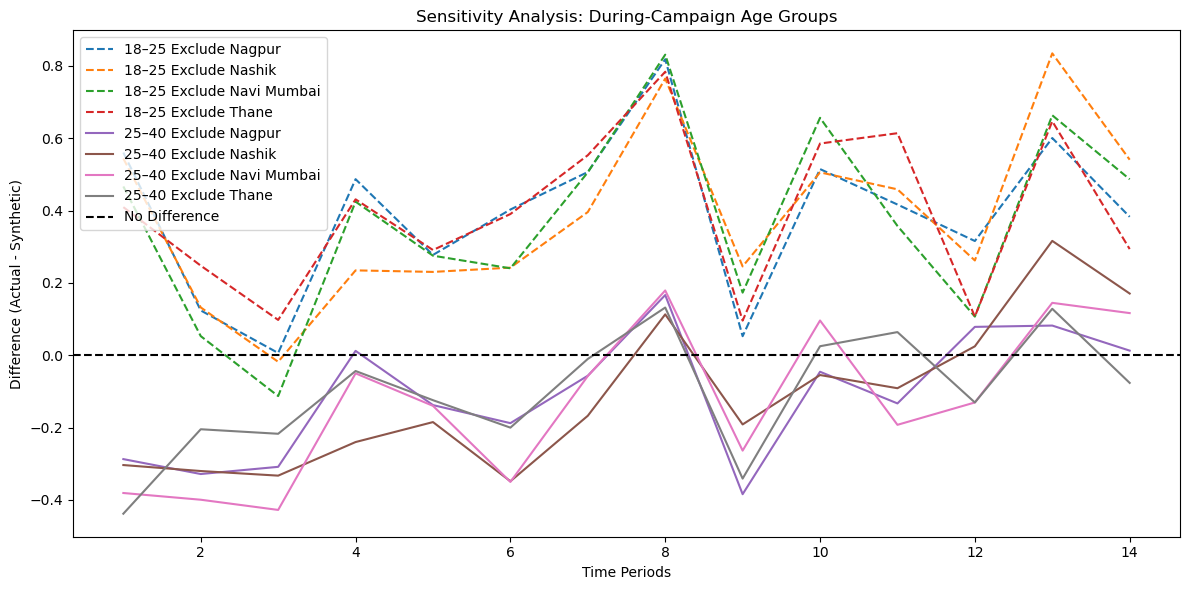

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths for control cities
control_file_paths = {
    "Nagpur": r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\Input\Pre\Scaled_Nagpur_Data.xlsx",
    "Nashik": r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\Input\Pre\Scaled_Nashik_Data.xlsx",
    "Navi Mumbai": r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\Input\Pre\Scaled_NaviMumbai_Data.xlsx",
    "Thane": r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\Input\Pre\Scaled_Thane_Data.xlsx"
}

# File paths for actual Pune data (both age groups)
actual_pune_file_paths = {
    "18_25": r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\Input\During Actual city 1.xlsx",
    "25_40": r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\Input\During Actual city 2.xlsx"
}

# Load control city data from Excel files
control_cities = {}
for city, path in control_file_paths.items():
    # Ensure we get the first column as a series and then convert it to a list
    control_cities[city] = pd.read_excel(path, header=None).iloc[:, 0].apply(pd.to_numeric, errors='coerce').tolist()

# Load actual Pune data for both age groups
actual_pune_18_25 = pd.read_excel(actual_pune_file_paths["18_25"], header=None).iloc[:, 0].apply(pd.to_numeric, errors='coerce').tolist()  # Age 18–25
actual_pune_25_40 = pd.read_excel(actual_pune_file_paths["25_40"], header=None).iloc[:, 0].apply(pd.to_numeric, errors='coerce').tolist()  # Age 25–40

# Synthetic weights from pre-campaign control data
synthetic_weights = {
    "Thane": 0.2724627123732575,
    "Nagpur": 0.26426954229314575,
    "Navi Mumbai": 0.20459072299713563,
    "Nashik": 0.25867702233646117
}

# Function to construct synthetic data by excluding one city
def construct_synthetic(control_cities, weights, exclude_city=None):
    synthetic_data = []
    for i in range(len(list(control_cities.values())[0])):  # Loop through each time period
        weighted_sum = 0
        for city, data in control_cities.items():  # For each city, access its data
            if city != exclude_city:
                weighted_sum += weights[city] * data[i]  # Multiply by the corresponding data point
        synthetic_data.append(weighted_sum)
    return synthetic_data

# Perform sensitivity analysis for each age group
variations_18_25 = {}
variations_25_40 = {}

for city in control_cities:
    # Construct synthetic Pune for each exclusion
    synthetic_18_25 = construct_synthetic(control_cities, synthetic_weights, exclude_city=city)
    synthetic_25_40 = construct_synthetic(control_cities, synthetic_weights, exclude_city=city)

    # Calculate differences for both age groups
    diff_18_25 = np.array(actual_pune_18_25) - np.array(synthetic_18_25)
    diff_25_40 = np.array(actual_pune_25_40) - np.array(synthetic_25_40)

    # Store results
    variations_18_25[city] = diff_18_25
    variations_25_40[city] = diff_25_40

# Prepare data for output Excel file
output_data = []
for city in control_cities:
    for i, time_period in enumerate(range(len(actual_pune_18_25))):
        row = {"Time Period": time_period + 1}  # Adding 1 to match human-friendly time periods (1-based index)
        row.update({f"18–25 Exclude {city}": variations_18_25[city][i]})
        row.update({f"25–40 Exclude {city}": variations_25_40[city][i]})
        output_data.append(row)

# Create DataFrame from the output data
output_df = pd.DataFrame(output_data)

# Save the DataFrame to an Excel file
output_file_path = r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\sensitivity_analysis_results.xlsx"
output_df.to_excel(output_file_path, index=False)

# Print the path of the output file
print(f"Results saved to: {output_file_path}")

# Plot results for both age groups
plt.figure(figsize=(12, 6))
for city, diff in variations_18_25.items():
    plt.plot(diff, label=f"18–25 Exclude {city}", linestyle="--")

for city, diff in variations_25_40.items():
    plt.plot(diff, label=f"25–40 Exclude {city}")

plt.axhline(0, color="black", linestyle="--", label="No Difference")
plt.title("Sensitivity Analysis: During-Campaign Age Groups")
plt.xlabel("Time Periods")
plt.ylabel("Difference (Actual - Synthetic)")
plt.legend()
plt.tight_layout()

# Save the plot as a PNG file
graph_file_path = r"C:\Users\karan\Downloads\Mansi Thesis\Sensitivity analysis\sensitivity_analysis_graph.png"
plt.savefig(graph_file_path, format="png")

# Print the path of the saved graph
print(f"Graph saved to: {graph_file_path}")

# Show the plot
plt.show()
